In [1]:
import sys
sys.version

'3.10.5 (main, Jun  6 2022, 18:49:26) [GCC 12.1.0]'

In [2]:
!pip install gensim

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import gensim
from gensim import corpora, models

corpus = corpora.BleiCorpus("./data/ap/ap.dat", "./data/ap/vocab.txt")

In [4]:
model = models.ldamodel.LdaModel(
    corpus,
    num_topics=100,
    id2word=corpus.id2word
)

In [5]:
doc = corpus.docbyoffset(0)
topics = model[doc]
print(topics)

[(12, 0.07757815), (16, 0.18414325), (22, 0.35916492), (31, 0.050590035), (54, 0.045389943), (60, 0.058538735), (62, 0.097619474), (66, 0.011357449), (71, 0.030512528), (76, 0.056612395), (98, 0.019676227)]


In [6]:
import matplotlib.pyplot as plt
import numpy as np

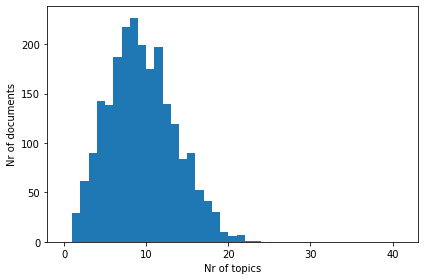

In [8]:
num_topics_used = [len(model[doc]) for doc in corpus]
fig,ax = plt.subplots()
ax.hist(num_topics_used, np.arange(42))
ax.set_ylabel('Nr of documents')
ax.set_xlabel('Nr of topics')
fig.tight_layout()
fig.savefig('Figure_04_01.png')

In [ ]:
ALPHA = 1.0

model1 = models.ldamodel.LdaModel(
    corpus, 
    num_topics=100,
    id2word=corpus.id2word, 
    alpha=ALPHA
)

In [ ]:
num_topics_used1 = [len(model1[doc]) for doc in corpus]

fig,ax = plt.subplots()
ax.hist([num_topics_used, num_topics_used1], np.arange(42))
ax.set_ylabel("Nr of documents")
ax.set_xlabel("Nr of topics")

# The coordinates below were fit by trial and error to look good
ax.text(9, 223, r"default alpha")
ax.text(26, 156, "alpha=1.0")
fig.tight_layout()
fig.savefig("Figure_04_02.png")